['TSLA']
[*********************100%***********************]  1 of 1 completed

TSLA
overlap 16 143.70000000000005 2299.2000000000007


  0%|          | 0/580 [00:00<?, ?it/s]

overlap 0 0 0
overlap 0 8.49501342773442 0.0
overlap 0 0 0
overlap 6 46.110015869140625 276.66009521484375
overlap 0 0 0
overlap 6 46.110015869140625 276.66009521484375
overlap 0 0 0
overlap 6 46.110015869140625 276.66009521484375
overlap 6 46.110015869140625 276.66009521484375


UnboundLocalError: local variable 'sample_boxes' referenced before assignment

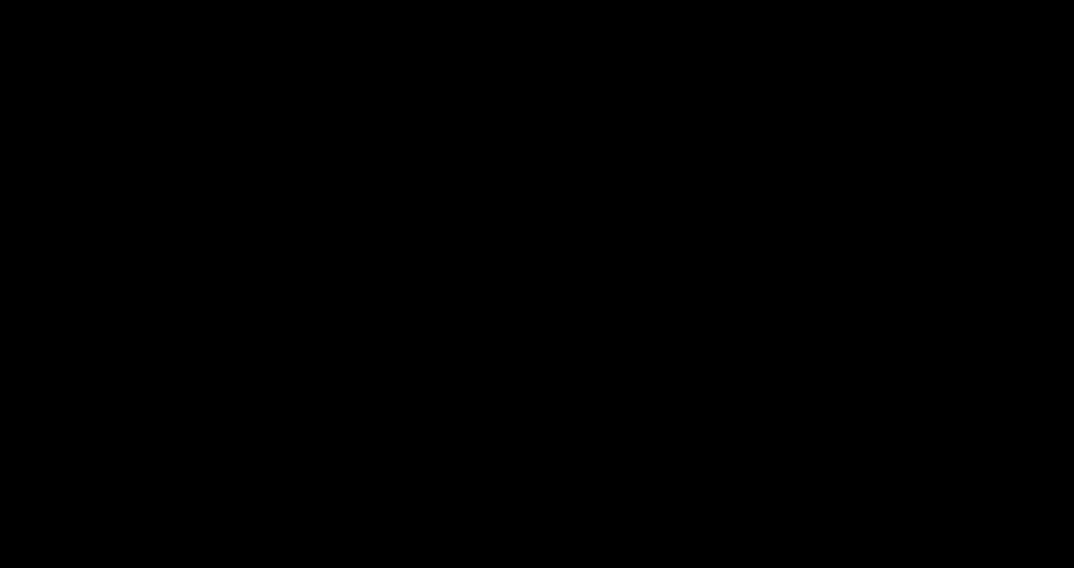

In [76]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
from IPython.display import display, HTML
from sr_cli import run

# TICKERS=['ARKK', 'ROKU', 'SHOP', 'TSLA', 'UPWK', 'ZM']
TICKER = 'TSLA'
  
class Args:
    no_sr_lines = False
    tickers=TICKER
    period='5y'
    interval='1d'
    start_date='2021-11-01'
    stop_date='2022-06-17'
    dif=10.0
    retracement_size=5
    no_candles=True
    draw_boxes=True
    number=2
    empty_boxes=False
    sample_only=False
    show_zags=False
    min=10
    optimize=False
    time=365
    verbose=False
    filter=False
    side_by_side=False

args=Args()
args.optimize = True

run(args)

from IPython.display import Image, display
display(Image(f"data/orig/{TICKER}.png"))

In [ ]:
df = pd.read_csv('data/samples.csv')
df = df[df.symbol == TICKER]
sfile = f"data/samples/{TICKER}.png"
df.loc[:, 'source'] = f'<img height=400 width=800 src="out/samples/{TICKER}.png" alt="img2">'
df.loc[:, 'img'] = df.outfile.apply(lambda x:  f'<img height=400 width=800 src="{x}" alt="img">')
display(HTML("<style>div.output_scroll { height: 80em; }</style>"))
sortdf = df[['symbol', 'dif', 'ret', 'err', 'img', 'source']].sort_values(by=['err'])
# sortdf = sortdf[sortdf.err < 30]
sortdf = sortdf[sortdf.ret < 15]
sortdf = sortdf[sortdf.dif < 15]
display(HTML(sortdf.to_html(index=False, escape=False)))

# df.loc[:, 'source'] = f'<img height=400 width=800 src="{sfile}" alt="img2">'
# df.loc[:, 'img'] = df.outfile.apply(lambda x:  f'<img height=400 width=800 src="{x}" alt="img">')
# sortdf = sortdf[(sortdf.dif >= 10.0) & (sortdf.ret == 5.0)]